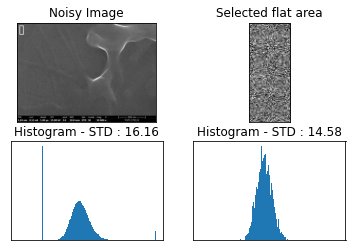

In [72]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#import seaborn as sns

#sns.set_style('darkgrid')


img = cv2.imread('SEM_djon/20210127-Ti3T3-1.00æs-3.0-078.tif',0)
row, col = img.shape
#gauss = np.random.normal(10,10,(row,col))
#noisy = img + gauss

# Set the coordinates of top left corner of rectangle
top_left = (30, 30)

#cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
#roi_image = gray[y:y+h, x:x+w]
# Set the coordinates of bottom right corner of rectangle
bottom_right = (70, 125)

# Set the line color to red in BGR
colour = (255, 255, 255)

# Set line thickness to 5px
thickness = 5

image = img.copy()
# Draw a rectangle with red borders and thickness of 5 px
image = cv2.rectangle(image, top_left, bottom_right, colour, thickness)


smooth_part = img[30:125, 30:70]

# Create figure and axes
plt.subplot(221),plt.imshow(image,cmap = 'gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(smooth_part,cmap = 'gray')
plt.title('Selected flat area'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.hist(img.ravel(),256,[0,256])#; plt.show()
plt.title('Histogram - STD : ' + str(round(estimate_noise_std(img),2)) ), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.hist(smooth_part.ravel(),256,[0,256])#; plt.show()
plt.title('Histogram - STD : ' + str(round(estimate_noise_std(smooth_part),2))), plt.xticks([]), plt.yticks([])
plt.savefig("electron_microscopy_djon_image.png", dpi=300)
plt.show()

In [1]:
def estimate_noise_std(img, average=True):
    """Estimate standard deviation of noise in ``img``.

    The algorithm, given in [Immerkaer1996], estimates the noise in an image.

    Parameters
    ----------
    img : array-like
        Array to estimate noise in.
    average : bool
        If ``True``, return the mean noise in the image, otherwise give a
        pointwise estimate.

    Returns
    -------
    noise : float

    Examples
    --------
    Create image with noise 1.0, verify result

    >>> img = np.random.randn(10, 10)
    >>> result = estimate_noise_std(img)  # should be about 1

    Also works with higher dimensional arrays

    >>> img = np.random.randn(3, 3, 3)
    >>> result = estimate_noise_std(img)

    The method can also estimate the noise pointwise (but with high
    uncertainity):

    >>> img = np.random.randn(3, 3, 3)
    >>> result = estimate_noise_std(img, average=False)

    References
    ----------
    [Immerkaer1996] Immerkaer, J. *Fast Noise Variance Estimation*.
    Computer Vision and Image Understanding, 1996.
    """
    import scipy.signal
    import functools
    img = np.asarray(img, dtype='float')

    M = functools.reduce(np.add.outer, [[-1, 2, -1]] * img.ndim)

    convolved = scipy.signal.fftconvolve(img, M, mode='valid')
    if average:
        conv_var = np.sum(convolved ** 2) / convolved.size
    else:
        conv_var = convolved ** 2

        # Pad in order to retain shape
        conv_var = np.pad(conv_var, pad_width=1, mode='edge')

    scale = np.sum(np.square(M))
    sigma = np.sqrt(conv_var / scale)

    return sigma 

In [30]:
estimate_noise_std(img)

32.826999108207204